# Recommendation System

## Obtain the movie lens dataset from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip It contains 100,000 ratings applied to 9,000 movies by 600 users. Refer the readme file in the dataset.

## Task 1: Read the dataset files and load them in appropriate data structure and display top-5 rows in each of them ( 2 marks )

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data_links = pd.read_csv("links.csv")
data_links.dropna(inplace=True)

data_movies = pd.read_csv("movies.csv")
data_movies.dropna(inplace=True)

data_ratings = pd.read_csv("ratings.csv")
data_ratings.dropna(inplace=True)

data_tags = pd.read_csv("tags.csv")
data_tags.dropna(inplace=True)

print(data_links.head(5))
print(data_movies.head(5))
print(data_ratings.head(5))
print(data_tags.head(5))

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   userId

## Task 2: Print CDF plot of average ratings given by users. X-axis is value of average ratings, and Y-axis is the cumulative frequency ( 2 marks )

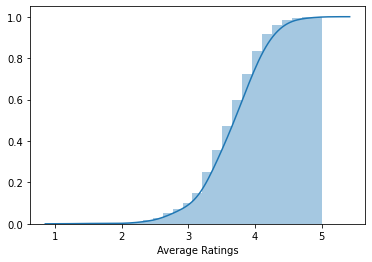

In [20]:
x_axis = data_ratings.groupby('userId')['rating'].mean()
kwargs = {'cumulative': True}
sns.distplot(x_axis, hist_kws=kwargs, kde_kws=kwargs, axlabel="Average Ratings")

## Task 3: Arrange users in increasing order of the average ratings they have given. Select a user (X1) at 30 percentile and print the movies and corresponding movies ratings given by X1 ( 2 marks )

In [26]:
temp = data_ratings.groupby('userId', as_index=False)['rating'].mean()
average_ratings_data = temp.sort_values(by=['rating'])
print(average_ratings_data)
average_ratings_data['rating'].quantile(0.3)

     userId    rating
441     442  1.275000
138     139  2.144330
507     508  2.145833
152     153  2.217877
566     567  2.245455
..      ...       ...
29       30  4.735294
24       25  4.807692
514     515  4.846154
250     251  4.869565
52       53  5.000000

[610 rows x 2 columns]


3.417892365761597

In [28]:
average_ratings_data.loc[average_ratings_data['rating']>=3.42]

,userId,rating
157,158,3.423077
501,502,3.428571
312,313,3.432353
113,114,3.435484
115,116,3.436782
...,...,...
29,30,4.735294
24,25,4.807692
514,515,4.846154
250,251,4.869565


In [32]:
data_merge_movies_ratings = pd.merge(data_movies, data_ratings, on = 'movieId')
result = data_merge_movies_ratings.loc[data_merge_movies_ratings['userId']==157]
result

,movieId,title,genres,userId,rating,timestamp
14157,527,Schindler's List (1993),Drama|War,157,5.0,992479576
19160,785,Kingpin (1996),Comedy,157,5.0,992479976
21413,953,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance,157,3.0,992479516
24535,1193,One Flew Over the Cuckoo's Nest (1975),Drama,157,3.0,992479618
28612,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,157,4.0,992479516
37190,1961,Rain Man (1988),Drama,157,4.0,992479546
42985,2392,Jack Frost (1998),Children|Comedy|Drama,157,3.0,992479954
44268,2490,Payback (1999),Action|Thriller,157,4.0,992480013
46367,2683,Austin Powers: The Spy Who Shagged Me (1999),Action|Adventure|Comedy,157,4.0,992479748
46461,2686,"Red Violin, The (Violon rouge, Le) (1998)",Drama|Mystery,157,3.0,992480036


## Task 4: Find top-5 users "similar" to this user (X1) based on movie ratings. Clearly mention (in comments) your criteria to compute similarity. ( 4 marks )

In [33]:
data_merge_movies_ratings.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [35]:
user_rating_movie = data_merge_movies_ratings.pivot_table(index='title', columns='userId', values='rating')
user_rating_movie.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Tis the Season for Love (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5


In [36]:
User_ratings = user_rating_movie[157]

In [42]:
# similarity check by using pearson method 
user_corr_ratings = user_rating_movie.corrwith(User_ratings,method='pearson')
corr_user_ratings = pd.DataFrame(user_corr_ratings, columns=['Correlation'])
corr_user_ratings.dropna(inplace=True)
corr_user_ratings.reset_index().head(10) 

/opt/anaconda3/envs/jupyter/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/envs/jupyter/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,userId,Correlation
0,1,0.801784
1,4,0.512989
2,15,0.489116
3,16,0.000000
4,18,0.188562
5,19,0.216645
6,20,1.000000
7,21,-0.035223
8,22,-1.000000
9,28,0.619749


In [41]:
corr_user_ratings.reset_index().sort_values('Correlation', ascending=False).head(5)

,userId,Correlation
119,312,1.0
44,113,1.0
59,157,1.0
74,201,1.0
89,233,1.0


## Task 5: Recommend top-10 movies to the user (X1) we have selected. ( 2 marks )

In [20]:
#